# Suppress warnings globally

In [1]:
options(warn = -1)   # turn off warnings

# Suppress warnings for a specific line/block

In [2]:
install.packages("caret")
install.packages("randomForest")  # caret uses this for rf method

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Load Libraries

In [3]:
install.packages("caret")
install.packages("randomForest")
install.packages("ggplot2")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(caret)
library(randomForest)
library(ggplot2)
library(dplyr)
library(readr)

Loading required package: ggplot2



Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:httr’:

    progress




randomForest 4.7-1.2



Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘randomForest’




The following object is masked from ‘package:ggplot2’:

    margin





Attaching package: ‘dplyr’




The following object is masked from ‘package:randomForest’:

    combine




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Turn warnings back on

In [5]:
options(warn = 0)   # default, warnings will show again

In [6]:
library(ggplot2)
library(dplyr)
library(caret)
library(readr)

# Load Dataset

In [7]:
iris_data <- read_csv("/kaggle/input/iris/Iris.csv")

Rows: 150 Columns: 6


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (5): Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Quick view

In [8]:
head(iris_data)
str(iris_data)
summary(iris_data)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


spc_tbl_ [150 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id           : num [1:150] 1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num [1:150] 5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num [1:150] 3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num [1:150] 1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num [1:150] 0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : chr [1:150] "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SepalLengthCm = col_double(),
  ..   SepalWidthCm = col_double(),
  ..   PetalLengthCm = col_double(),
  ..   PetalWidthCm = col_double(),
  ..   Species = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


       Id         SepalLengthCm    SepalWidthCm   PetalLengthCm  
 Min.   :  1.00   Min.   :4.300   Min.   :2.000   Min.   :1.000  
 1st Qu.: 38.25   1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600  
 Median : 75.50   Median :5.800   Median :3.000   Median :4.350  
 Mean   : 75.50   Mean   :5.843   Mean   :3.054   Mean   :3.759  
 3rd Qu.:112.75   3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100  
 Max.   :150.00   Max.   :7.900   Max.   :4.400   Max.   :6.900  
  PetalWidthCm     Species         
 Min.   :0.100   Length:150        
 1st Qu.:0.300   Class :character  
 Median :1.300   Mode  :character  
 Mean   :1.199                     
 3rd Qu.:1.800                     
 Max.   :2.500                     


# Drop Id column if exists

In [9]:
iris_data <- iris_data %>% select(-Id)

# EDA (Exploratory Data Analysis)

## Class distribution

In [10]:
table(iris_data$Species)


    Iris-setosa Iris-versicolor  Iris-virginica 
             50              50              50 

# Pairplot (scatterplot matrix)

Warning message in pairs.default(iris_data[, 1:4], col = as.numeric(iris_data$Species), :
“NAs introduced by coercion”


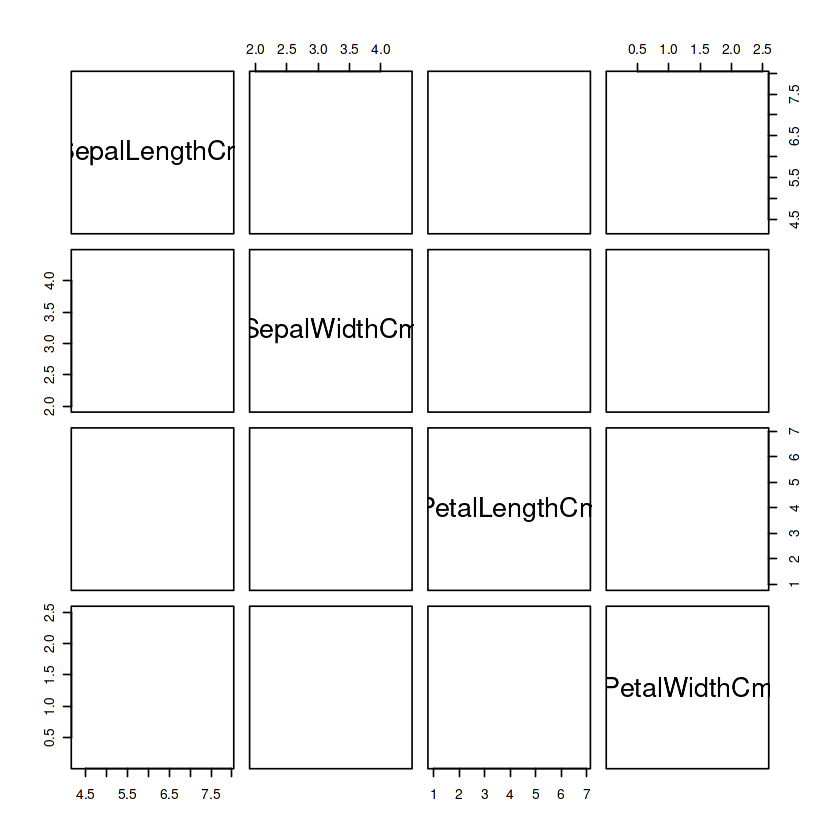

In [11]:
pairs(iris_data[,1:4],
      col = as.numeric(iris_data$Species),
      pch = 19)   # pch=19 makes filled circles

# Boxplots

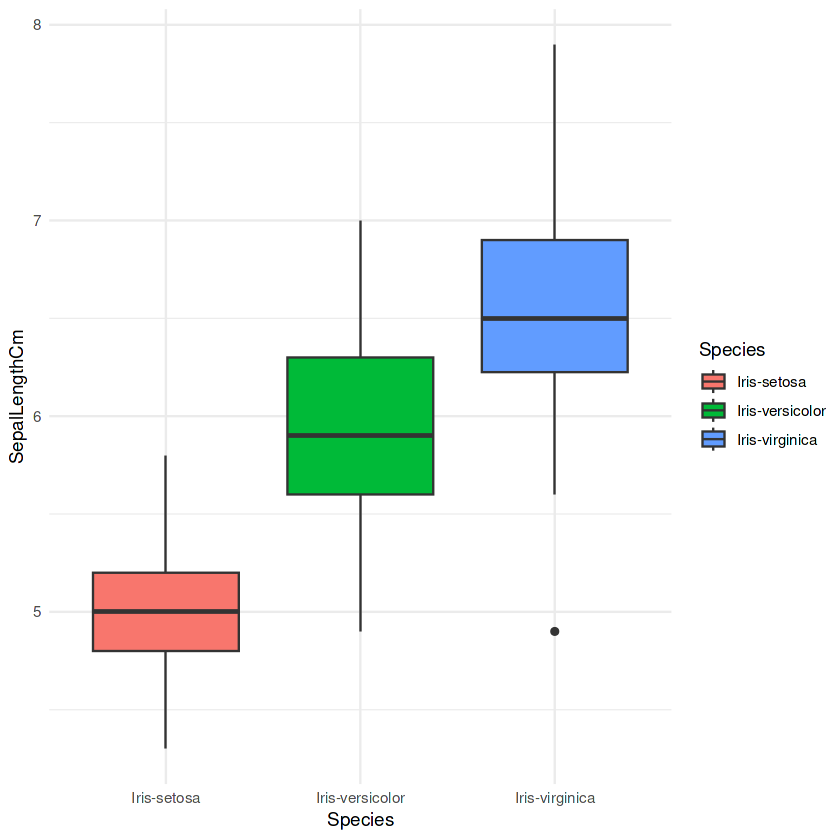

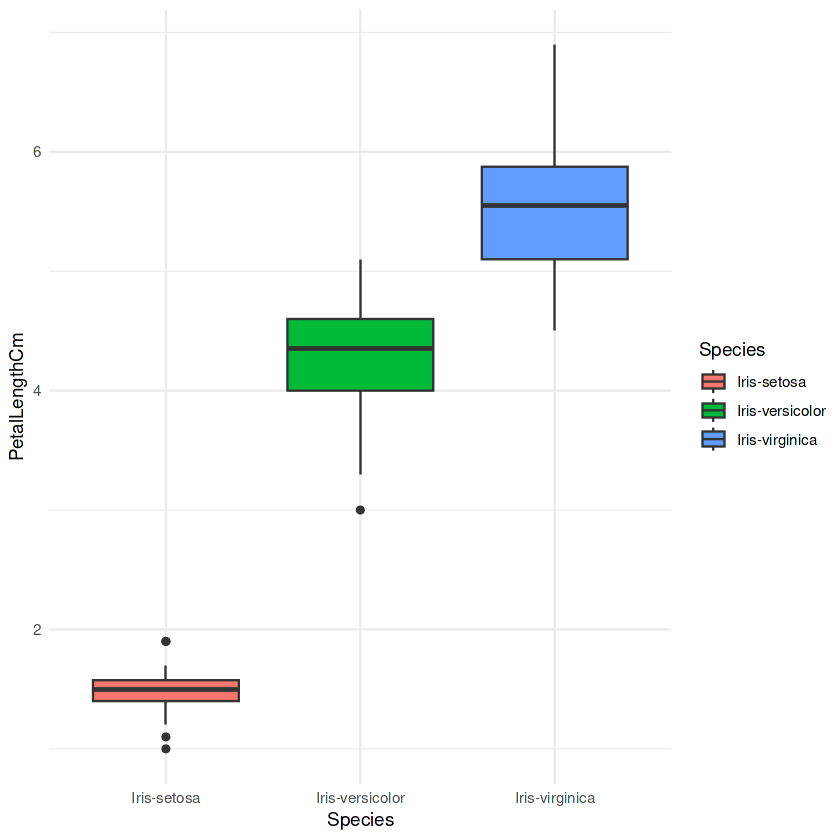

In [12]:
ggplot(iris_data, aes(x = Species, y = SepalLengthCm, fill = Species)) +
  geom_boxplot() + theme_minimal()

ggplot(iris_data, aes(x = Species, y = PetalLengthCm, fill = Species)) +
  geom_boxplot() + theme_minimal()

# Correlation heatmap

In [13]:
cor_matrix <- cor(iris_data[,1:4])
print(cor_matrix)

              SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
SepalLengthCm     1.0000000   -0.1093692     0.8717542    0.8179536
SepalWidthCm     -0.1093692    1.0000000    -0.4205161   -0.3565441
PetalLengthCm     0.8717542   -0.4205161     1.0000000    0.9627571
PetalWidthCm      0.8179536   -0.3565441     0.9627571    1.0000000


# Prediction Model

## Convert Species to factor

In [14]:
iris_data$Species <- as.factor(iris_data$Species)

## Train-test split

In [15]:
set.seed(123)
trainIndex <- createDataPartition(iris_data$Species, p = 0.8, list = FALSE)
trainData <- iris_data[trainIndex,]
testData <- iris_data[-trainIndex,]

# Train model (Random Forest)

In [16]:
model <- train(Species ~ ., data = trainData, method = "rf")

# Model summary

In [17]:
print(model)

Random Forest 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 120, 120, 120, 120, 120, 120, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9474229  0.9201435
  3     0.9455403  0.9172896
  4     0.9462277  0.9182848

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


# Predictions

In [18]:
predictions <- predict(model, newdata = testData)

## Ensure both are factors with same levels

In [19]:
predictions <- factor(predictions, levels = levels(testData$Species))

# Confusion matrix

In [20]:
conf_matrix <- confusionMatrix(predictions, testData$Species)
print(conf_matrix)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              2
  Iris-virginica            0               0              8

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 0.9000
Pos Pred Value                   1.0000                 0.8333
Neg Pred Value

# Accuracy Result

In [21]:
cat("Model Accuracy:", conf_matrix$overall['Accuracy'])

Model Accuracy: 0.9333333